# Basic MNIST Usage

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
# MNIST 불러오기

%matplotlib inline
print("TensorFlow version is [%s]" % (tf.__version__))

TensorFlow version is [1.12.0]


## Download MNIST

In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)
# MNIST 불러오고 one_hot_encoding 실행하기

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E5CBC57F98>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E5CBB61FD0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001E5CBB61E80>)

In [7]:
mnist.train

In [9]:
# train data 개수

mnist.train.num_examples

55000

## How does it look like?

In [4]:
def print_np(x):
    print('Shape is %s' % (x.shape,))
    print('Values look like \n %s' % (x))

In [12]:
# Train Images 모습

print_np(mnist.train.images)
print('----------------------')
print_np(mnist.train.labels)

# 학습데이터 55000장
# Images : Train 데이터를 한 줄로 피면 784 (28 * 28)

# 학습데이터 55000장
# Labels : 10개
# One-Hot Encoding을 적용한게 Labels로 들어감
# 하나만 1이고, 나머지는 다 0

Shape is (55000, 784)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
----------------------
Shape is (55000, 10)
Values look like 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [13]:
# Test Images 모습

print_np(mnist.test.images)
print('----------------------')
print_np(mnist.test.labels)

# Test 데이터 10000장
# Images : Test 데이터를 한 줄로 피면 784 (28 * 28)

# Test 데이터 10000장
# Labels : 10개
# One-Hot Encoding을 적용한게 Labels로 들어감
# 하나만 1이고, 나머지는 다 0

Shape is (10000, 784)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
----------------------
Shape is (10000, 10)
Values look like 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
# Validation Images 모습

print_np(mnist.validation.images)
print('----------------------')
print_np(mnist.validation.labels)

# Validation 데이터 5000장
# Images : Validation 데이터를 한 줄로 피면 784 (28 * 28)

# Validation 데이터 5000장
# Labels : 10개
# One-Hot Encoding을 적용한게 Labels로 들어감
# 하나만 1이고, 나머지는 다 0

Shape is (5000, 784)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
----------------------
Shape is (5000, 10)
Values look like 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


## Plot Train Images

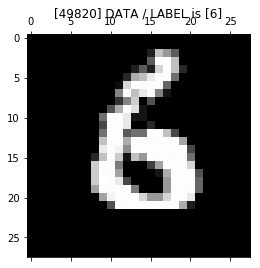

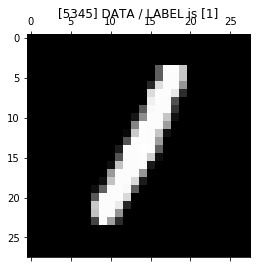

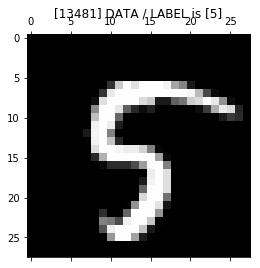

In [18]:
# 그림 그리기

ntrain = mnist.train.images.shape[0]
# rows의 개수를 가져오는 학습데이터의 개수

nsample = 3
# 랜덤으로 3개를 뽑음

randidx = np.random.randint(ntrain, size = nsample)

for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28, 28))
    label = np.argmax(labelvec)
    # 라벨 붙이기
    
    plt.matshow(img, cmap = plt.get_cmap('gray'))
    # 보여주기
    
    plt.title("[%d] DATA / LABEL is [%d]" % (i, label))
    # 제목

## Get Random MiniBatch

### First, Random Permute

In [20]:
ntrain = 10 # Train 개수 10개
randindices = np.random.permutation(ntrain)
print(randindices.shape)

(10,)


### Then, Select MiniBatch

In [22]:
ntrain = 10
nbatch = 4
niter = ntrain // nbatch + 1

for i in range(niter):
    currindices = randindices[i * nbatch : (i+1) * nbatch]
    print("ITER : [%d] Batch Index : %s" % (i, currindices))
    
    # Get Batch
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    
    print("    - Shape of 'X batch' is %s" % (xbatch.shape,))
    print("    - Shape of 'Y batch' is %s" % (ybatch.shape,))

ITER : [0] Batch Index : [9 3 5 6]
    - Shape of 'X batch' is (4, 784)
    - Shape of 'Y batch' is (4, 10)
ITER : [1] Batch Index : [8 0 1 2]
    - Shape of 'X batch' is (4, 784)
    - Shape of 'Y batch' is (4, 10)
ITER : [2] Batch Index : [4 7]
    - Shape of 'X batch' is (2, 784)
    - Shape of 'Y batch' is (2, 10)
